In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [86]:
url = r'https://raw.githubusercontent.com/lcbjrrr/QuantumF/main/credit%20-%20ok.csv'

df_credito = pd.read_csv(url)

REALIZAREMOS ALGUMAS ANÁLISES DESCRITIVAS

In [87]:
df_credito.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         8322
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       12441
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                 9522
Delay_from_due_date             0
Num_of_Delayed_Payment       5805
Changed_Credit_Limit            0
Num_Credit_Inquiries         1616
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           7485
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      3689
Payment_Behaviour               0
Monthly_Balance              1019
Credit_Score                    0
dtype: int64

In [88]:
df_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83144 entries, 0 to 83143
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        83144 non-null  object 
 1   Customer_ID               83144 non-null  object 
 2   Month                     83144 non-null  object 
 3   Name                      74822 non-null  object 
 4   Age                       83144 non-null  object 
 5   SSN                       83144 non-null  object 
 6   Occupation                83144 non-null  object 
 7   Annual_Income             83144 non-null  object 
 8   Monthly_Inhand_Salary     70703 non-null  float64
 9   Num_Bank_Accounts         83144 non-null  int64  
 10  Num_Credit_Card           83144 non-null  int64  
 11  Interest_Rate             83144 non-null  int64  
 12  Num_of_Loan               83144 non-null  object 
 13  Type_of_Loan              73622 non-null  object 
 14  Delay_

In [89]:
df_credito.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,70703.000000,83144.000000,83144.000000,83144.000000,83144.000000,81528.000000,83144.000000,83144.000000
mean,4193.869821,16.924059,22.301309,73.209191,21.050382,27.681594,32.298935,1380.861140
std,3187.081513,116.875468,128.481073,470.881900,14.841171,192.442884,5.116523,8243.094161
min,319.556250,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1629.773333,3.000000,4.000000,8.000000,10.000000,3.000000,28.063496,30.403233
50%,3081.977500,6.000000,6.000000,13.000000,18.000000,6.000000,32.333159,68.966090
75%,5947.320000,7.000000,7.000000,20.000000,28.000000,9.000000,36.517910,160.321434
max,15204.633330,1798.000000,1499.000000,5789.000000,67.000000,2597.000000,50.000000,82331.000000


NOTAMOS INICIALMENTE QUE TEMOS MISSING VALUES NAS COLUNAS QUE ACIMA MOSTRAM DIFERENTE DE ZERO (Name, Monthly_Inhand_Salary, Type_of_Loan, Num_of_Delayed_Payment, Num_Credit_Inquiries, Credit_History_Age, Amount_invested_monthly, Monthly_Balance)

ISSO NÃO SIGNIFICA QUE NÃO PRECISAMOS OLHAR AS OUTRAS COLUNAS.

TEMOS COLUNAS COM TIPO ERRADO E QUE PRECISAM SER CORRIGIDAS. TEMOS COLUNAS ANTES QUE PRECISAM SER TRATADAS PARA AÍ SIM SEREM TROCADAS O TIPO, ENTÃO IREMOS ANALISAR COLUNA A COLUNA.

In [90]:
df_credito['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

DECIDIMOS AJUSTAR (MAP) PARA NÚMERO DO MÊS A COLUNA 'MONTH'

In [91]:
mapping_month = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8
}

# Aplicando o mapeamento à coluna 'Month'
df_credito['Month'] = df_credito['Month'].map(mapping_month)

PRÓXIMO A ANALISAR É A COLUNA 'NAME', MAS O NOME DA PESSOA NÃO SERÁ UTILIZADA PARA DEFINIR SE A PESSOA TEM OU NÃO UM BOM SCORE DE CRÉDITO

In [92]:
df_credito = df_credito.drop(columns=['ID','Name','SSN'],axis=1)

AGORA VAMOS ANALISAR A COLUNA IDADE.

In [93]:
df_credito = df_credito.sort_values(by=['Customer_ID', 'Month'],ascending=True)

In [94]:
df_credito = df_credito.sort_values(by=['Customer_ID', 'Month'],ascending=True)

df_credito['Age'] = pd.to_numeric(df_credito['Age'], errors='coerce')

df_credito['Age'] = df_credito.groupby('Customer_ID')['Age'].transform(lambda x: x.where((x >= 0) & (x <= 100), np.nan))

In [95]:
print(np.sort(df_credito['Age'].unique()))

[ 14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  95.  99. 100.  nan]


AVALIAMOS QUE AS IDADES PODEM VARIAR DE 14 ATÉ 56. ASSUMIREMOS QUE 95, 99 E 100 TAMBÉM SÃO GAPS E PRECISAM SER TRATADOS

In [96]:
df_credito['Age'] = df_credito.groupby('Customer_ID')['Age'].transform(lambda x: x.where((x >= 14) & (x <= 60), np.nan))
print(np.sort(df_credito['Age'].unique()))

[14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31.
 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49.
 50. 51. 52. 53. 54. 55. 56. nan]


In [97]:
def preencher_age(df):
    df['Age'] = df.groupby('Customer_ID')['Age'].transform(lambda x: x.ffill().bfill())
    return df

# Aplicando a correção
df_credito = preencher_age(df_credito)

In [98]:
print(np.sort(df_credito['Age'].unique()))

[14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31.
 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49.
 50. 51. 52. 53. 54. 55. 56.]


AGORA VAMOS PARA OCUPAÇÃO (EMPREGO)

In [99]:
df_credito['Occupation'].unique() #avaliamos quais ocupações existem no dataset

array(['Lawyer', 'Mechanic', '_______', 'Media_Manager', 'Doctor',
       'Journalist', 'Manager', 'Entrepreneur', 'Scientist', 'Accountant',
       'Architect', 'Teacher', 'Writer', 'Musician', 'Developer',
       'Engineer'], dtype=object)

In [100]:
#precisamos tratar o '_______', assumindo que este não tem emprego e isso seria 0
df_credito['Occupation'] = df_credito['Occupation'].replace('_______',np.nan)

def preencher_Occupation(df):
    df['Occupation'] = df.groupby('Customer_ID')['Occupation'].transform(lambda x: x.ffill().bfill())
    return df

# Aplicando a correção
df_credito = preencher_Occupation(df_credito)
df_credito['Occupation'] = df_credito['Occupation'].str.replace("_"," ")

AGORA VAMOS PARA ANNUAL_INCOME

In [101]:
df_credito['Annual_Income'] = df_credito['Annual_Income'].str.replace("_","")
df_credito['Annual_Income'] = df_credito['Annual_Income'].astype(float)

E ASSIM POR DIANTE

In [102]:
# Função geral para preencher valores nulos com a moda
def preenchermoda(df, column):
    df[column] = df.groupby('Customer_ID')[column].transform(lambda x: x.mode()[0] if not x.mode().empty else x)
    return df

# Função geral para preencher valores nulos com a média
def preenchermedia(df, column):
    df[column] = pd.to_numeric(df[column], errors='coerce')  # Garantindo que a coluna seja numérica
    df[column] = df.groupby('Customer_ID')[column].transform(lambda x: x.fillna(x.mean()))
    return df

# Função geral para substituir valores negativos por zero
def trocarnegativoporzero(df, column):
    df[column] = df[column].apply(lambda x: 0 if x < 0 else x)
    return df

# Ajustes específicos para cada coluna usando as funções genéricas
df_credito = preenchermedia(df_credito, 'Monthly_Inhand_Salary')
df_credito = trocarnegativoporzero(df_credito, 'Num_Bank_Accounts')
df_credito = preenchermoda(df_credito, 'Num_Bank_Accounts')
df_credito = preenchermoda(df_credito, 'Num_Credit_Card')
df_credito = preenchermoda(df_credito, 'Interest_Rate')

# Ajustes para 'Num_of_Loan'
df_credito['Num_of_Loan'] = df_credito['Num_of_Loan'].str.replace("_", "").astype(int)
df_credito = trocarnegativoporzero(df_credito, 'Num_of_Loan')
df_credito = preenchermoda(df_credito, 'Num_of_Loan')

# Ajustes para 'Delay_from_due_date'
df_credito = trocarnegativoporzero(df_credito, 'Delay_from_due_date')

# Ajustes para 'Num_of_Delayed_Payment'
df_credito['Num_of_Delayed_Payment'] = df_credito['Num_of_Delayed_Payment'].str.replace("_", "")
df_credito = preenchermoda(df_credito, 'Num_of_Delayed_Payment')
df_credito['Num_of_Delayed_Payment'] = df_credito['Num_of_Delayed_Payment'].astype(int)
df_credito = trocarnegativoporzero(df_credito, 'Num_of_Delayed_Payment')

# Ajustes para 'Changed_Credit_Limit'
df_credito['Changed_Credit_Limit'] = df_credito['Changed_Credit_Limit'].str.replace("_", "")
df_credito = preenchermedia(df_credito, 'Changed_Credit_Limit')

# Ajustes para 'Credit_Mix'
df_credito['Credit_Mix'] = df_credito['Credit_Mix'].replace('_', pd.NA)
df_credito = preenchermoda(df_credito, 'Credit_Mix')

# Ajustes para 'Outstanding_Debt'
df_credito['Outstanding_Debt'] = df_credito['Outstanding_Debt'].str.replace("_", "")
df_credito = preenchermedia(df_credito, 'Outstanding_Debt')

# Ajustes para 'Type_of_Loan'
df_credito = preenchermoda(df_credito, 'Type_of_Loan')
df_credito['Type_of_Loan'] = df_credito['Type_of_Loan'].fillna("Not Specified")

# Ajustes para 'Num_Credit_Inquiries'
df_credito = preenchermoda(df_credito, 'Num_Credit_Inquiries')

# Função para converter idade de histórico de crédito para meses
def converteanosparameses(age):
    if isinstance(age, str):
        years, months = 0, 0
        if 'Years' in age:
            years = int(age.split('Years')[0].strip())
        if 'Months' in age:
            months = int(age.split('and')[1].replace('Months', '').strip())
        return years * 12 + months
    return np.nan

# Função para tratar a coluna com todas as abordagens possíveis
def trata_credit_history_age(df, coluna_idade='Credit_History_Age', coluna_cliente='Customer_ID'):
    # 1. Converter idade para meses
    df[coluna_idade] = df[coluna_idade].apply(converteanosparameses)
    
    # 2. Interpolação e preenchimento
    def processa_grupo(grupo):
        # Interpolar valores dentro do grupo
        grupo[coluna_idade] = grupo[coluna_idade].interpolate(method='linear')
        # Preencher valores nulos no início e no fim do grupo
        grupo[coluna_idade] = grupo[coluna_idade].fillna(method='ffill').fillna(method='bfill')
        return grupo
    
    # 3. Aplicar a função de processamento em cada grupo, garantindo que o índice original seja mantido
    df = df.groupby(coluna_cliente, group_keys=False).apply(processa_grupo)
    
    return df

# Exemplo de aplicação
df_credito = trata_credit_history_age(df_credito)

# Ajustes para 'Payment_of_Min_Amount'
df_credito = preenchermoda(df_credito, 'Payment_of_Min_Amount')

# Ajustes para 'Total_EMI_per_month'
df_credito = preenchermoda(df_credito, 'Total_EMI_per_month')

# Ajustes para 'Amount_invested_monthly'
df_credito = preenchermedia(df_credito, 'Amount_invested_monthly')

def trocavalorinvalido(df):
    def substituir_invalido(grupo):
        # Verifica se o grupo possui uma moda (caso haja empate, seleciona o primeiro)
        moda = grupo[grupo != "!@9#%8"].mode()
        # Substitui "!@9#%8" pela moda, se a moda existir
        if not moda.empty:
            return grupo.replace("!@9#%8", moda[0])
        else:
            return grupo  # Se não houver moda, retorna o grupo como está
    
    # Aplica a função de substituição grupo a grupo por 'Customer_ID'
    df['Payment_Behaviour'] = df.groupby('Customer_ID')['Payment_Behaviour'].transform(substituir_invalido)
    
    return df

# Aplicar a função ao dataframe
df_credito = trocavalorinvalido(df_credito)

# Ajustes para 'Monthly_Balance'
df_credito = preenchermedia(df_credito, 'Monthly_Balance')

/tmp/ipykernel_8970/1933712047.py:78: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  grupo[coluna_idade] = grupo[coluna_idade].fillna(method='ffill').fillna(method='bfill')
/tmp/ipykernel_8970/1933712047.py:82: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(coluna_cliente, group_keys=False).apply(processa_grupo)


In [103]:
df_credito.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83144 entries, 56752 to 82303
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               83144 non-null  object 
 1   Month                     83144 non-null  int64  
 2   Age                       83144 non-null  float64
 3   Occupation                83144 non-null  object 
 4   Annual_Income             83144 non-null  float64
 5   Monthly_Inhand_Salary     83144 non-null  float64
 6   Num_Bank_Accounts         83144 non-null  int64  
 7   Num_Credit_Card           83144 non-null  int64  
 8   Interest_Rate             83144 non-null  int64  
 9   Num_of_Loan               83144 non-null  int64  
 10  Type_of_Loan              83144 non-null  object 
 11  Delay_from_due_date       83144 non-null  int64  
 12  Num_of_Delayed_Payment    83144 non-null  int64  
 13  Changed_Credit_Limit      83144 non-null  float64
 14  Num_Cre

CORRIGINDO OS TYPES DOS DADOS, CASO NECESSÁRIO

In [104]:
df_credito['Age'] = df_credito['Age'].astype(int)
df_credito['Num_Credit_Inquiries'] = df_credito['Num_Credit_Inquiries'].astype(int)
df_credito['Credit_History_Age'] = df_credito['Credit_History_Age'].astype(int)

In [105]:
#checando novamente se há missing data

df_credito.isnull().sum()

Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [106]:
df_credito

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
56752,CUS_0x1000,1,17,Lawyer,30625.94,2706.161667,6,5,27,2,...,Bad,1562.91,26.612093,122,Yes,42.94109,244.750283,Low_spent_Large_value_payments,252.924793,Standard
56753,CUS_0x1000,2,17,Lawyer,30625.94,2706.161667,6,5,27,2,...,Bad,1562.91,29.439759,123,Yes,42.94109,176.132567,High_spent_Small_value_payments,311.542510,Poor
56754,CUS_0x1000,3,17,Lawyer,30625.94,2706.161667,6,5,27,2,...,Bad,1562.91,38.285928,124,Yes,42.94109,109.056519,High_spent_Medium_value_payments,368.618558,Poor
56755,CUS_0x1000,4,17,Lawyer,30625.94,2706.161667,6,5,27,2,...,Bad,1562.91,32.843081,125,Yes,42.94109,87.909909,High_spent_Medium_value_payments,419.765167,Poor
56756,CUS_0x1000,5,17,Lawyer,30625.94,2706.161667,6,5,27,2,...,Bad,1562.91,32.330508,126,Yes,42.94109,191.834767,Low_spent_Large_value_payments,305.840309,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82299,CUS_0xffd,4,29,Scientist,41398.44,3749.870000,8,7,13,6,...,Standard,1701.88,36.384516,221,Yes,182.97665,234.354940,High_spent_Medium_value_payments,247.655411,Standard
82300,CUS_0xffd,5,29,Scientist,41398.44,3749.870000,8,7,13,6,...,Standard,1701.88,26.166508,222,Yes,182.97665,104.629474,High_spent_Medium_value_payments,337.380877,Standard
82301,CUS_0xffd,6,29,Scientist,41398.44,3749.870000,8,7,13,6,...,Standard,1701.88,36.970072,223,Yes,182.97665,47.007379,High_spent_Medium_value_payments,395.002972,Standard
82302,CUS_0xffd,7,29,Scientist,41398.44,3749.870000,8,7,13,6,...,Standard,1701.88,33.916363,224,Yes,182.97665,257.989693,High_spent_Small_value_payments,194.020657,Good


Agora podemos dropar o Customer_Id já que ele apenas estava sendo utilizado para tratar os dados.

In [107]:
df_credito = df_credito.drop(columns=['Customer_ID'],axis=1)

Precisamos transformar colunas categóricas em dummies, mas antes iremos analisar a coluna Type of Loan para tratar os multivalores.

Occupation, Type_of_Loan, Credit_Mix, Payment_of_Min_Amount  e Payment_Behaviour precisam ser ajustadas.

In [108]:
# Remover "and" da coluna para garantir a consistência
df_credito['Type_of_Loan'] = df_credito['Type_of_Loan'].str.replace('and ', '', regex=False)

# Agora, dividir os tipos de empréstimos e explodir a lista em valores únicos
loan_types = df_credito['Type_of_Loan'].dropna().str.split(', ').explode().unique()

# Criar colunas no DataFrame para cada tipo de empréstimo e contar as ocorrências
for loan_type in loan_types:
    df_credito[loan_type] = df_credito['Type_of_Loan'].apply(lambda x: x.count(loan_type) if pd.notnull(x) else 0)

df_credito = df_credito.drop(columns=['Type_of_Loan'],axis=1)

# Exibir as primeiras linhas com as novas colunas
df_credito

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Score,Credit-Builder Loan,Home Equity Loan,Not Specified,Payday Loan,Student Loan,Debt Consolidation Loan,Auto Loan,Mortgage Loan,Personal Loan
56752,1,17,Lawyer,30625.94,2706.161667,6,5,27,2,62,...,Standard,1,1,0,0,0,0,0,0,0
56753,2,17,Lawyer,30625.94,2706.161667,6,5,27,2,62,...,Poor,1,1,0,0,0,0,0,0,0
56754,3,17,Lawyer,30625.94,2706.161667,6,5,27,2,62,...,Poor,1,1,0,0,0,0,0,0,0
56755,4,17,Lawyer,30625.94,2706.161667,6,5,27,2,64,...,Poor,1,1,0,0,0,0,0,0,0
56756,5,17,Lawyer,30625.94,2706.161667,6,5,27,2,67,...,Poor,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82299,4,29,Scientist,41398.44,3749.870000,8,7,13,6,19,...,Standard,0,1,0,3,0,0,1,1,0
82300,5,29,Scientist,41398.44,3749.870000,8,7,13,6,23,...,Standard,0,1,0,3,0,0,1,1,0
82301,6,29,Scientist,41398.44,3749.870000,8,7,13,6,23,...,Standard,0,1,0,3,0,0,1,1,0
82302,7,29,Scientist,41398.44,3749.870000,8,7,13,6,23,...,Good,0,1,0,3,0,0,1,1,0


In [109]:
df_credito= pd.get_dummies(df_credito, columns=['Occupation','Payment_Behaviour','Payment_of_Min_Amount'],drop_first=True)

In [110]:
mapping_credit_mix = {
    'Good': 1,
    'Standard': 0,
    'Bad': -1
}

# Aplicando o mapeamento à coluna 'Credit_Mix'
df_credito['Credit_Mix'] = df_credito['Credit_Mix'].map(mapping_credit_mix)

In [111]:
mapping_credit_score = {
    'Good': 2,
    'Standard': 1,
    'Poor': 0
}

# Aplicando o mapeamento à coluna 'Credit_Score'
df_credito['Credit_Score'] = df_credito['Credit_Score'].map(mapping_credit_score)

In [112]:
df_credito.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83144 entries, 56752 to 82303
Data columns (total 50 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Month                                               83144 non-null  int64  
 1   Age                                                 83144 non-null  int64  
 2   Annual_Income                                       83144 non-null  float64
 3   Monthly_Inhand_Salary                               83144 non-null  float64
 4   Num_Bank_Accounts                                   83144 non-null  int64  
 5   Num_Credit_Card                                     83144 non-null  int64  
 6   Interest_Rate                                       83144 non-null  int64  
 7   Num_of_Loan                                         83144 non-null  int64  
 8   Delay_from_due_date                                 83144 non-null  int64  
 

Credit_Score                                          1.000000
Credit_Mix                                            0.493972
Payment_of_Min_Amount_No                              0.436218
Credit_History_Age                                    0.386776
Monthly_Inhand_Salary                                 0.210694
Monthly_Balance                                       0.204063
Amount_invested_monthly                               0.157777
Age                                                   0.153121
Credit_Utilization_Ratio                              0.043317
Payment_Behaviour_High_spent_Medium_value_payments    0.040860
Month                                                 0.017770
Payment_Behaviour_High_spent_Small_value_payments     0.014418
Occupation_Journalist                                 0.011717
Occupation_Media Manager                              0.011228
Annual_Income                                         0.010390
Occupation_Architect                                  0

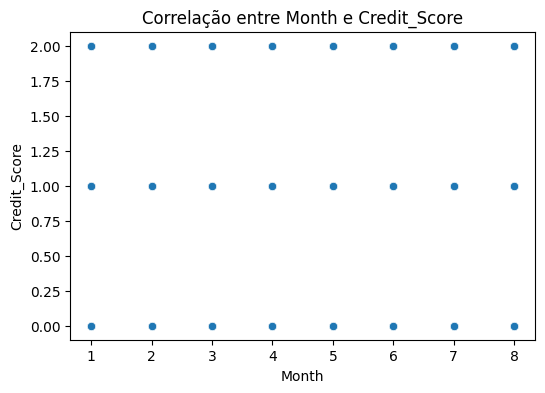

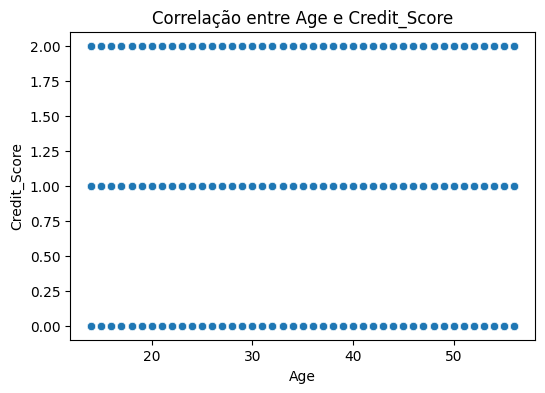

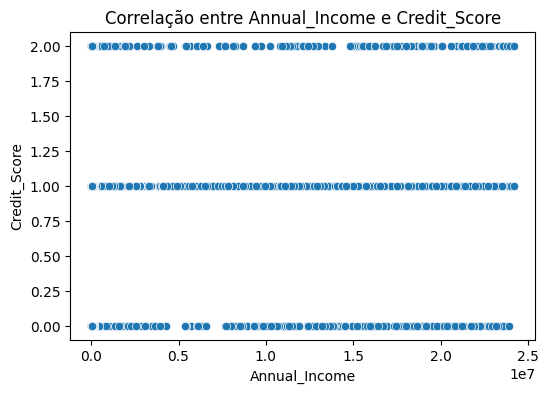

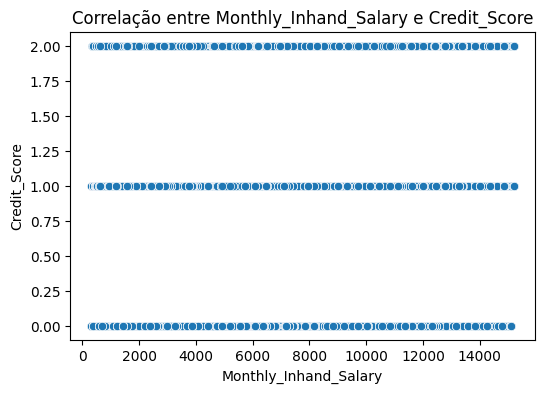

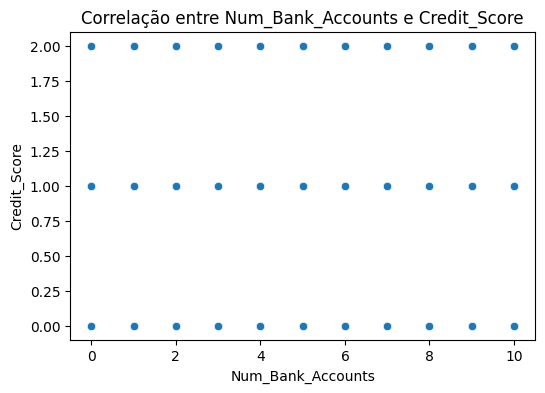

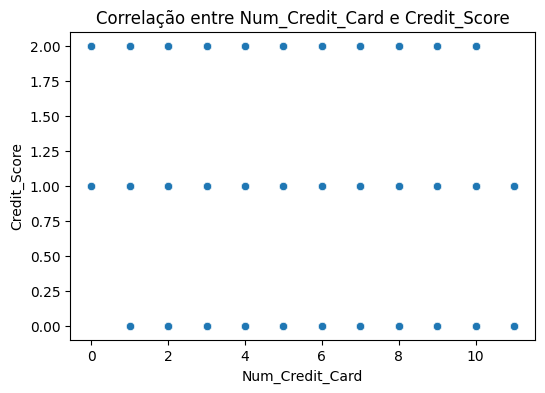

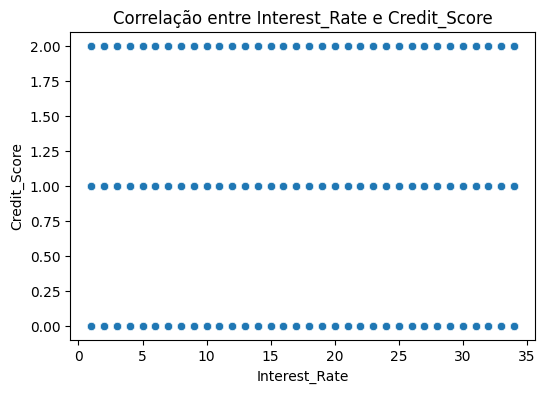

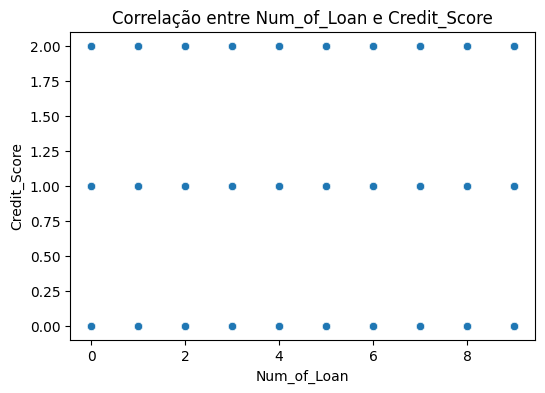

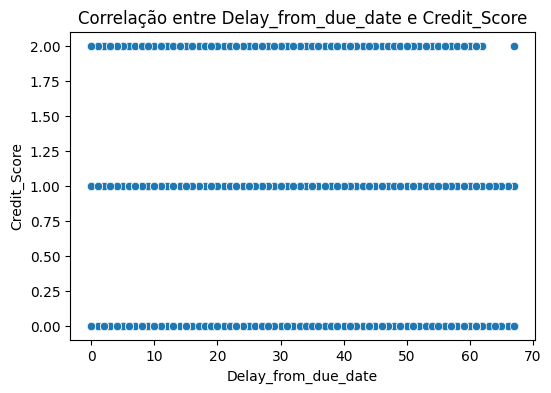

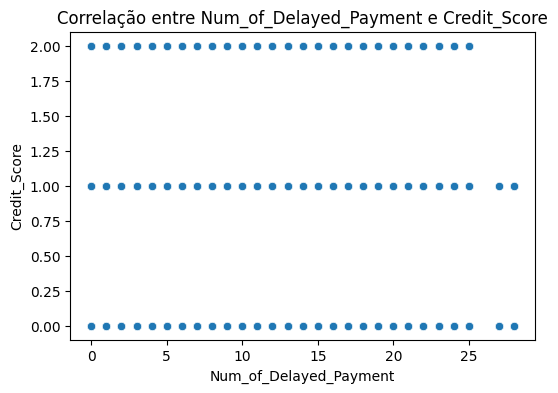

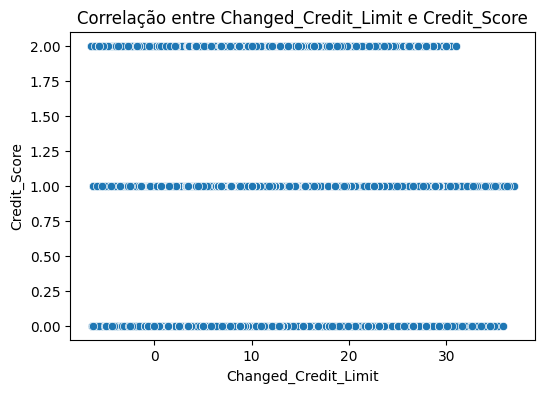

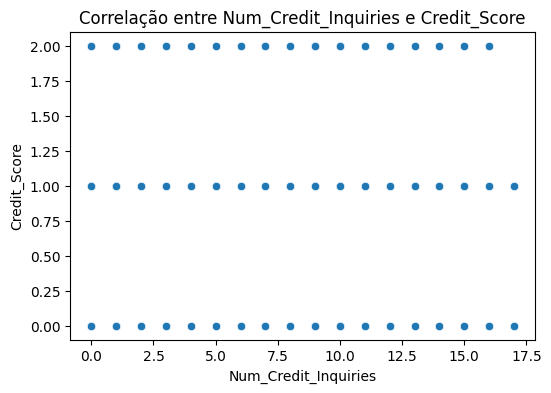

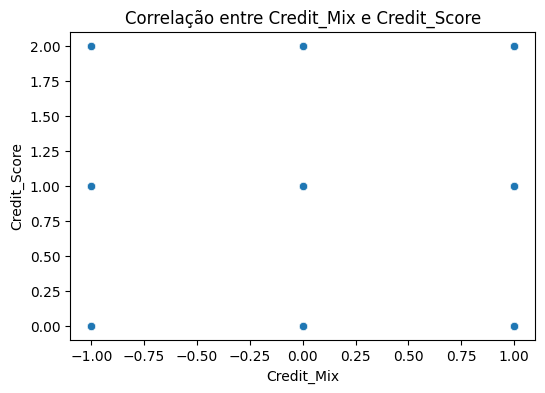

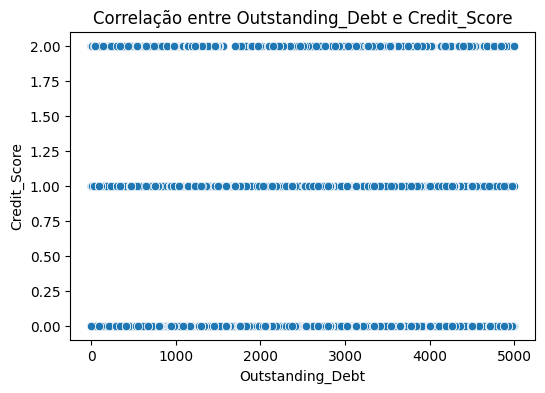

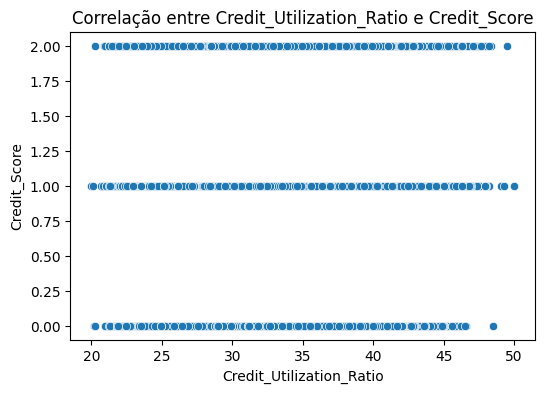

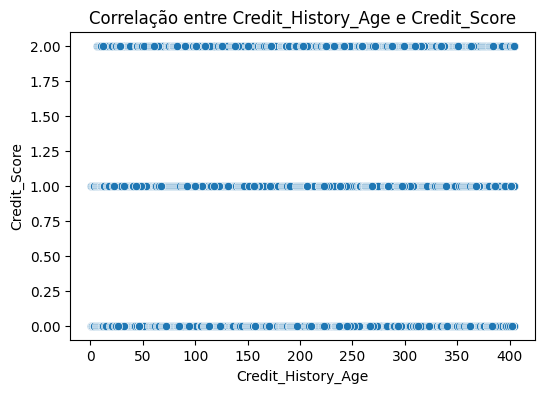

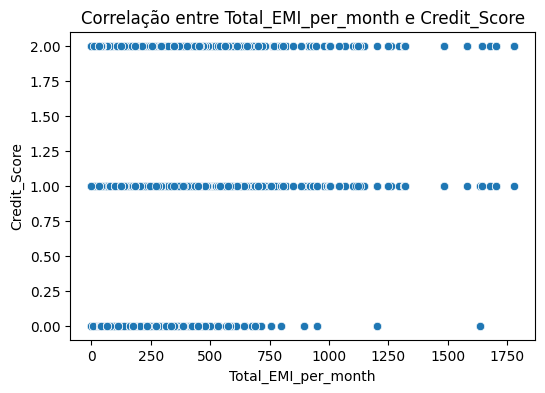

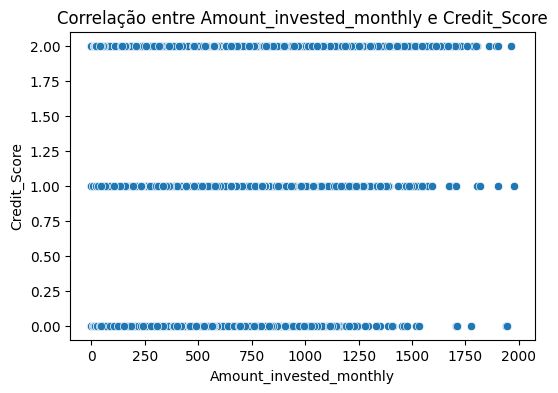

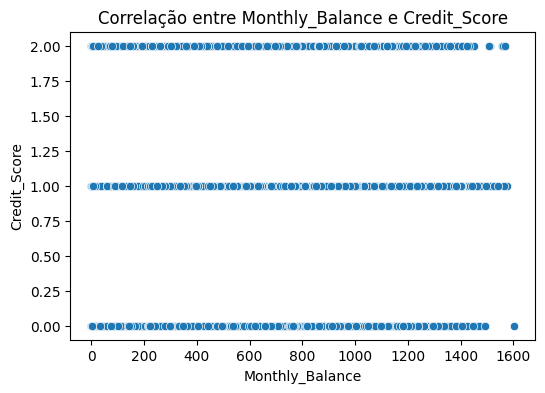

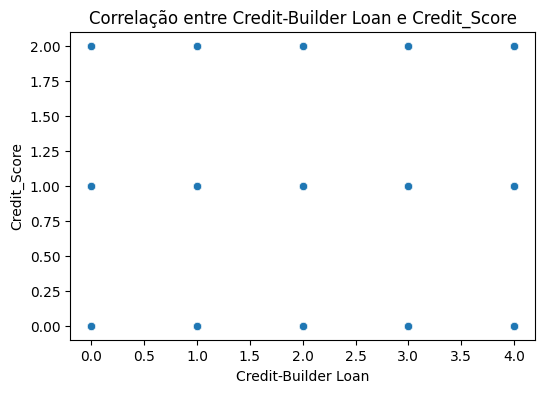

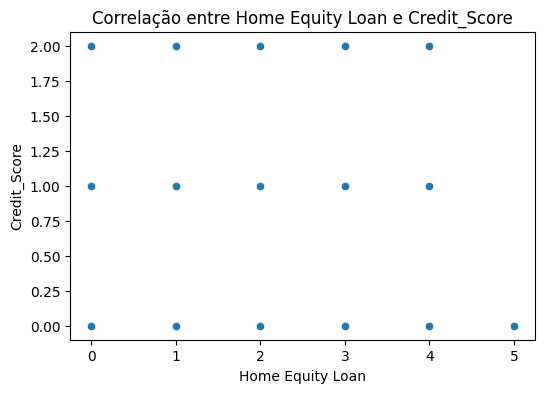

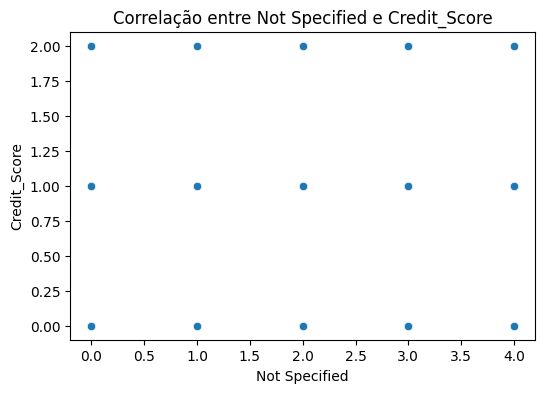

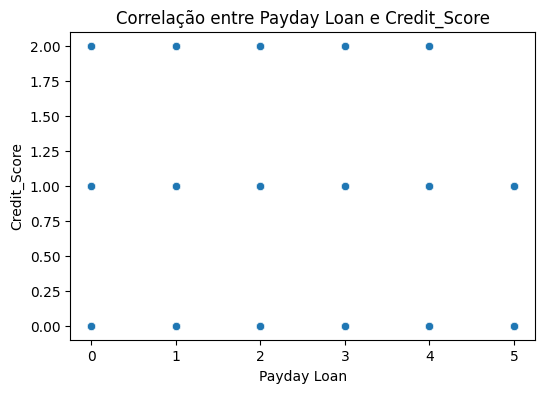

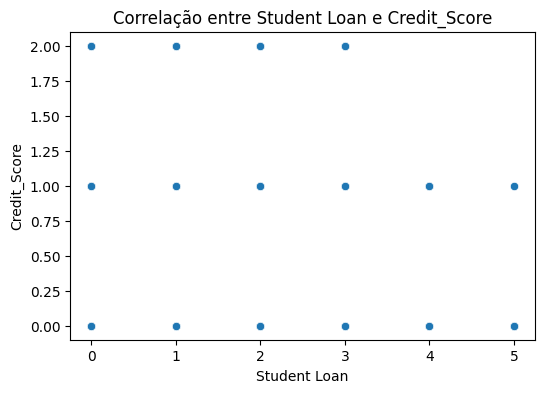

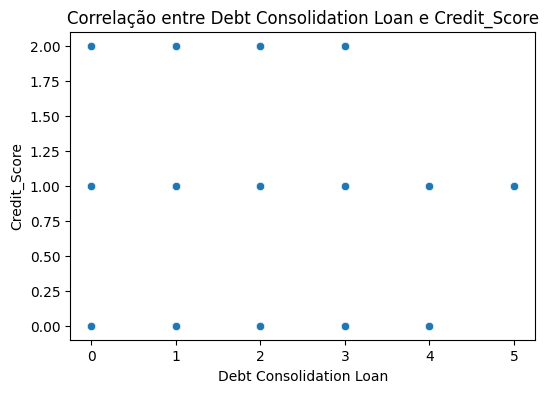

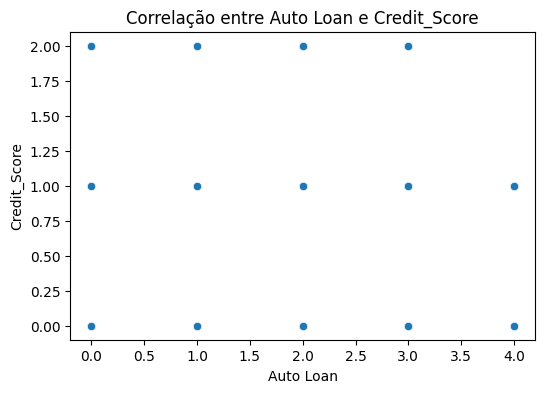

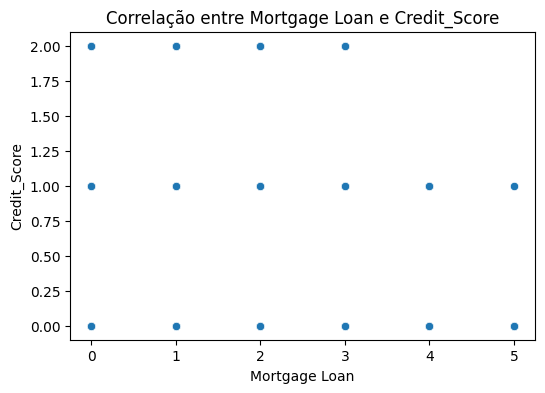

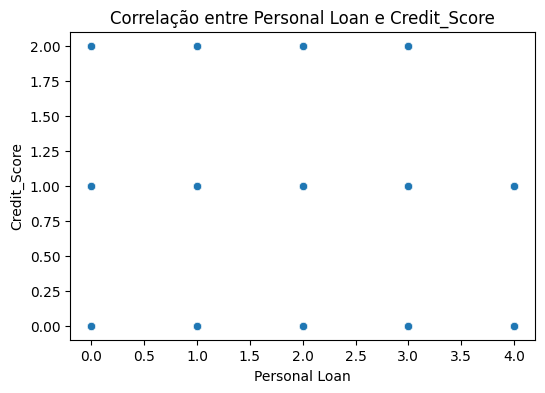

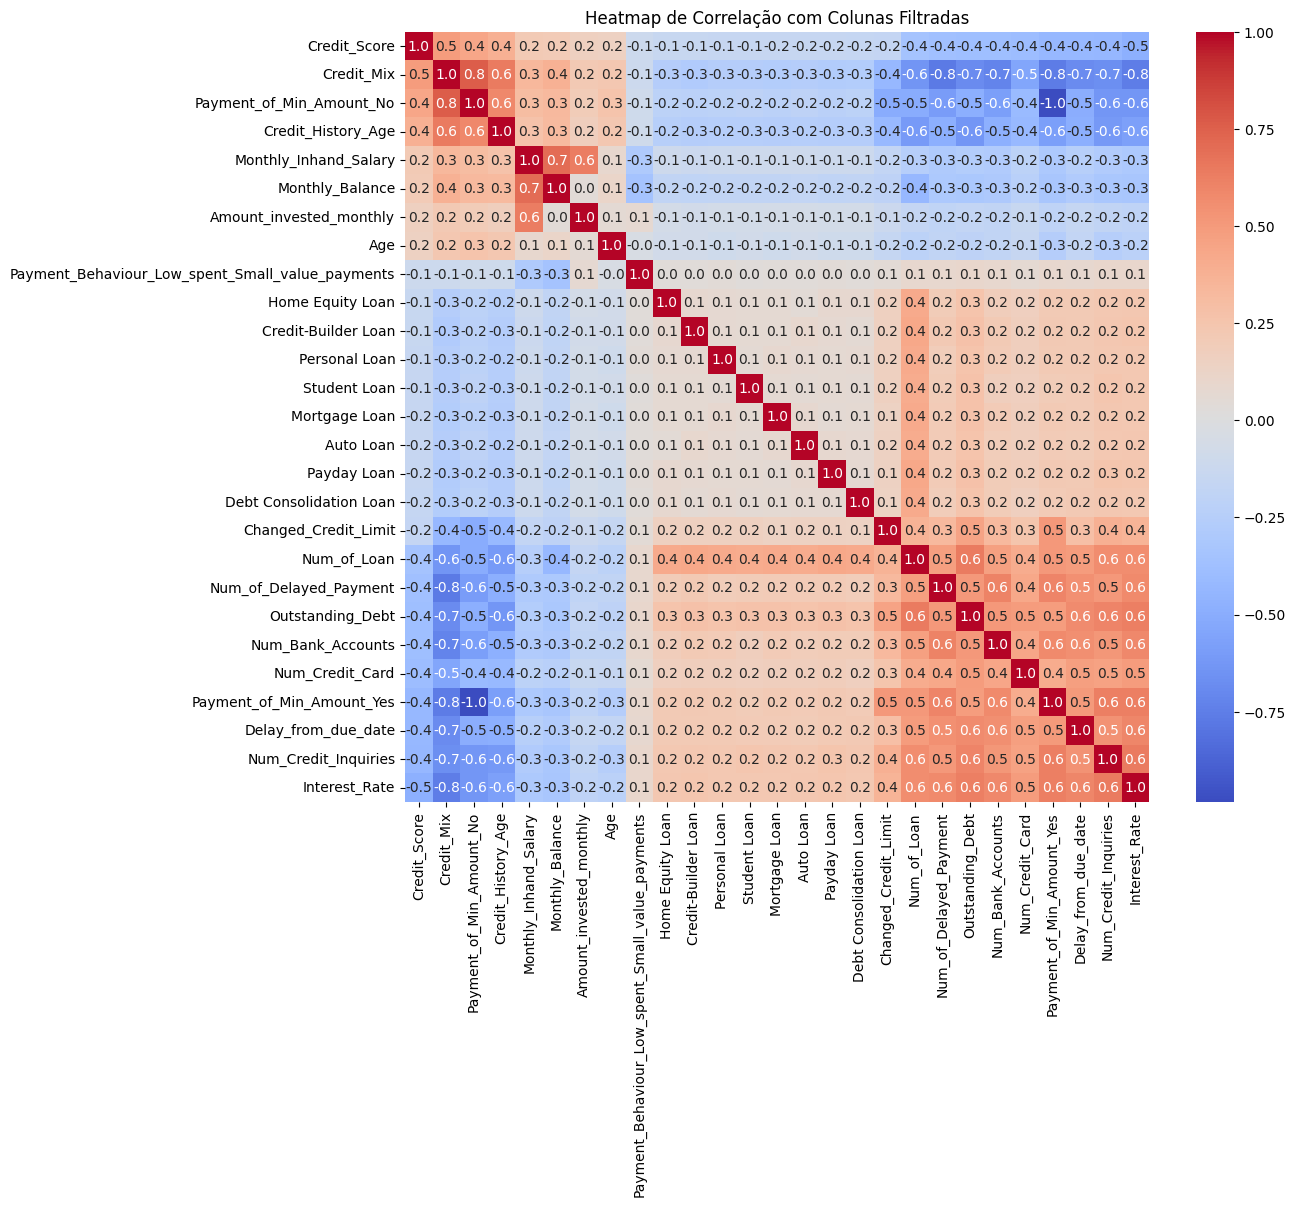

In [113]:
# Calcular a correlação entre todas as variáveis numéricas
correlation_matrix = df_credito.corr()

# Exibir as correlações da coluna 'Credit_Score_Num' com outras variáveis
credit_score_corr = correlation_matrix['Credit_Score'].sort_values(ascending=False)
print(credit_score_corr)

# Plotar gráficos de correlação para as variáveis com 'Credit_Score_Num'
for column in df_credito.select_dtypes(include=['float64', 'int64']).columns:
    if column != 'Credit_Score':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df_credito[column], y=df_credito['Credit_Score'])
        plt.title(f'Correlação entre {column} e Credit_Score')
        plt.xlabel(column)
        plt.ylabel('Credit_Score')
        plt.show()

# Filtrar as colunas que têm correlação maior que 0.1 ou menor que -0.1 com 'Credit_Score_Num'
columns_to_keep = credit_score_corr[(credit_score_corr > 0.1) | (credit_score_corr < -0.1)].index

# Manter apenas essas colunas no df_credito
df_credito = df_credito[list(columns_to_keep)]

# Atualizar a matriz de correlação após a filtragem
correlation_matrix_filtered = df_credito.corr()

# Criar o heatmap de correlação entre as variáveis filtradas
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Heatmap de Correlação com Colunas Filtradas')
plt.show()

In [114]:
#Iremos dropar algumas colunas pois parecem ter multicolinearidade

df_credito = df_credito.drop(columns=['Payment_of_Min_Amount_No'],axis=1)

In [115]:
df_credito

,Credit_Score,Credit_Mix,Credit_History_Age,Monthly_Inhand_Salary,Monthly_Balance,Amount_invested_monthly,Age,Payment_Behaviour_Low_spent_Small_value_payments,Home Equity Loan,Credit-Builder Loan,...,Changed_Credit_Limit,Num_of_Loan,Num_of_Delayed_Payment,Outstanding_Debt,Num_Bank_Accounts,Num_Credit_Card,Payment_of_Min_Amount_Yes,Delay_from_due_date,Num_Credit_Inquiries,Interest_Rate
56752,1,-1,122,2706.161667,252.924793,244.750283,17,False,1,1,...,1.63,2,25,1562.91,6,5,True,62,11,27
56753,0,-1,123,2706.161667,311.542510,176.132567,17,False,1,1,...,1.63,2,25,1562.91,6,5,True,62,11,27
56754,0,-1,124,2706.161667,368.618558,109.056519,17,False,1,1,...,1.63,2,25,1562.91,6,5,True,62,11,27
56755,0,-1,125,2706.161667,419.765167,87.909909,17,False,1,1,...,1.63,2,25,1562.91,6,5,True,64,11,27
56756,0,-1,126,2706.161667,305.840309,191.834767,17,False,1,1,...,2.63,2,25,1562.91,6,5,True,67,11,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82299,1,0,221,3749.870000,247.655411,234.354940,29,False,1,0,...,10.07,6,12,1701.88,8,7,True,19,7,13
82300,1,0,222,3749.870000,337.380877,104.629474,29,False,1,0,...,10.07,6,12,1701.88,8,7,True,23,7,13
82301,1,0,223,3749.870000,395.002972,47.007379,29,False,1,0,...,10.07,6,12,1701.88,8,7,True,23,7,13
82302,2,0,224,3749.870000,194.020657,257.989693,29,False,1,0,...,10.07,6,12,1701.88,8,7,True,23,7,13


In [116]:
#Separação do Conjunto de Treinamento e Teste

X = df_credito.drop('Credit_Score', axis=1)
y = df_credito['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Normalização do Conjunto

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [117]:
# Treinamento
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [118]:
# Validações do Treino
score = knn.score(X_train_scaled, y_train)

print('Score Treino: ', score * 100)

Score Treino:  87.77491408934708


In [119]:
# Predição
prev_teste = knn.predict(X_test_scaled)
prev_teste

array([2, 0, 1, ..., 0, 1, 2])

Score Teste: 77.77421423989736
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      7296
           1       0.81      0.78      0.79     13195
           2       0.72      0.73      0.73      4453

    accuracy                           0.78     24944
   macro avg       0.76      0.77      0.77     24944
weighted avg       0.78      0.78      0.78     24944



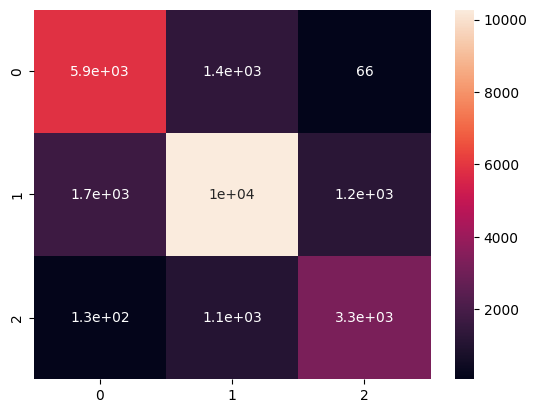

In [120]:
# Validação do Teste

matrix = confusion_matrix(y_test,  prev_teste)
sns.heatmap(matrix, annot=True)

print('Score Teste:', accuracy_score(y_test, prev_teste) * 100)
print(classification_report(y_test,  prev_teste))